100


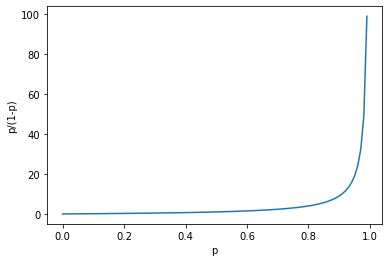

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

# 오즈비odds ratio는 성공확률과 실패확률의 비율을 나타내는 값
# 오즈비 공식은 p/(1-p)
# p는 성공확률
probs = np.arange(0, 1, 0.01)
print(len(probs))
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

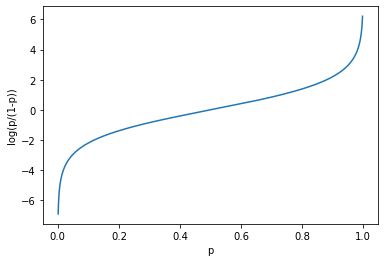

In [3]:
# 오즈비에 로그함수를 취하여 만든 logit 함수
# p가 0.5일 때 0이 되고 p가 0, 1일 때 무한대로 음수와 양수가 되는 특징을 가짐

probs = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

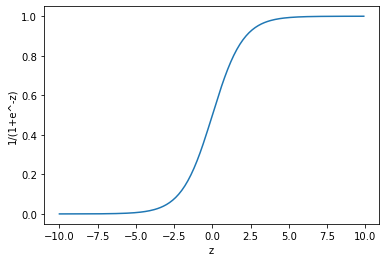

In [4]:
# log(p/(1-p))=z를 z에 대해 정리한 식으로 로지스틱 함수, sigmoid 함수라고도 함
# exp()가 log()의 역함수
# logit 함수의 x, y축이 바뀐 모양

zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


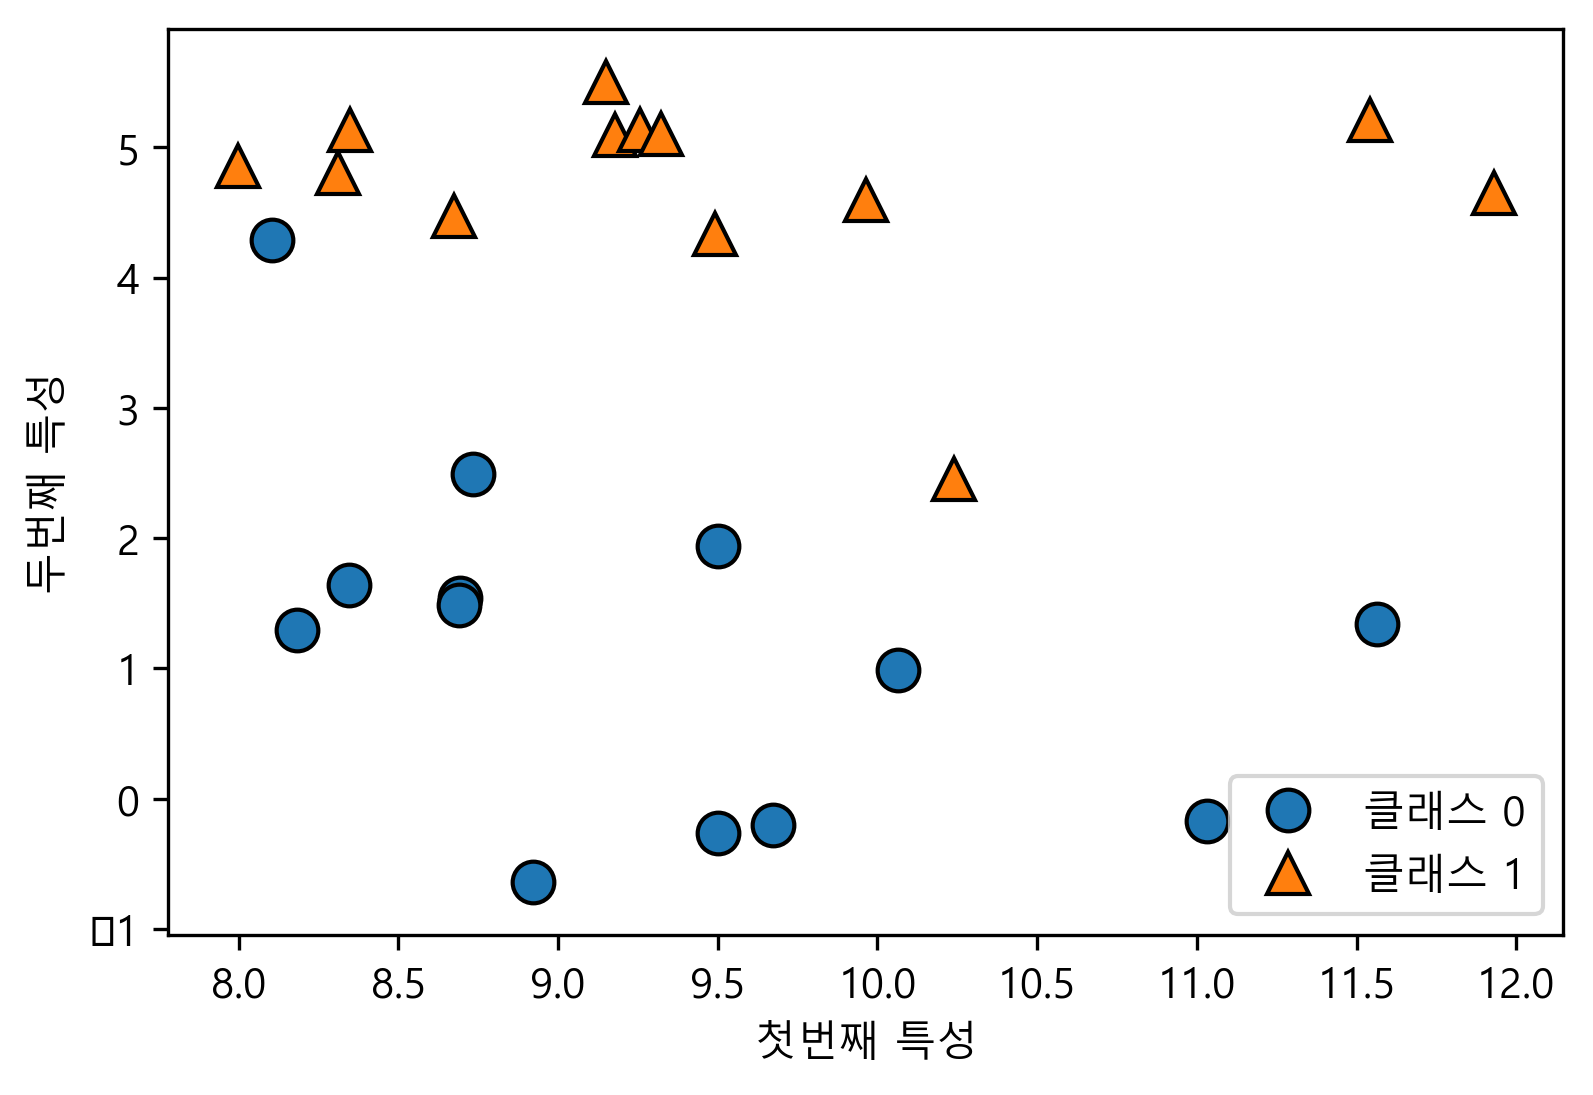

In [7]:
plt.rcParams['figure.dpi'] = 300 # 해상도 높임
X, y = mglearn.datasets.make_forge() # 랜덤 데이터셋 선정
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # 산점도 그래프 그리기
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape: {}".format(X.shape)) # 샘플수 26개

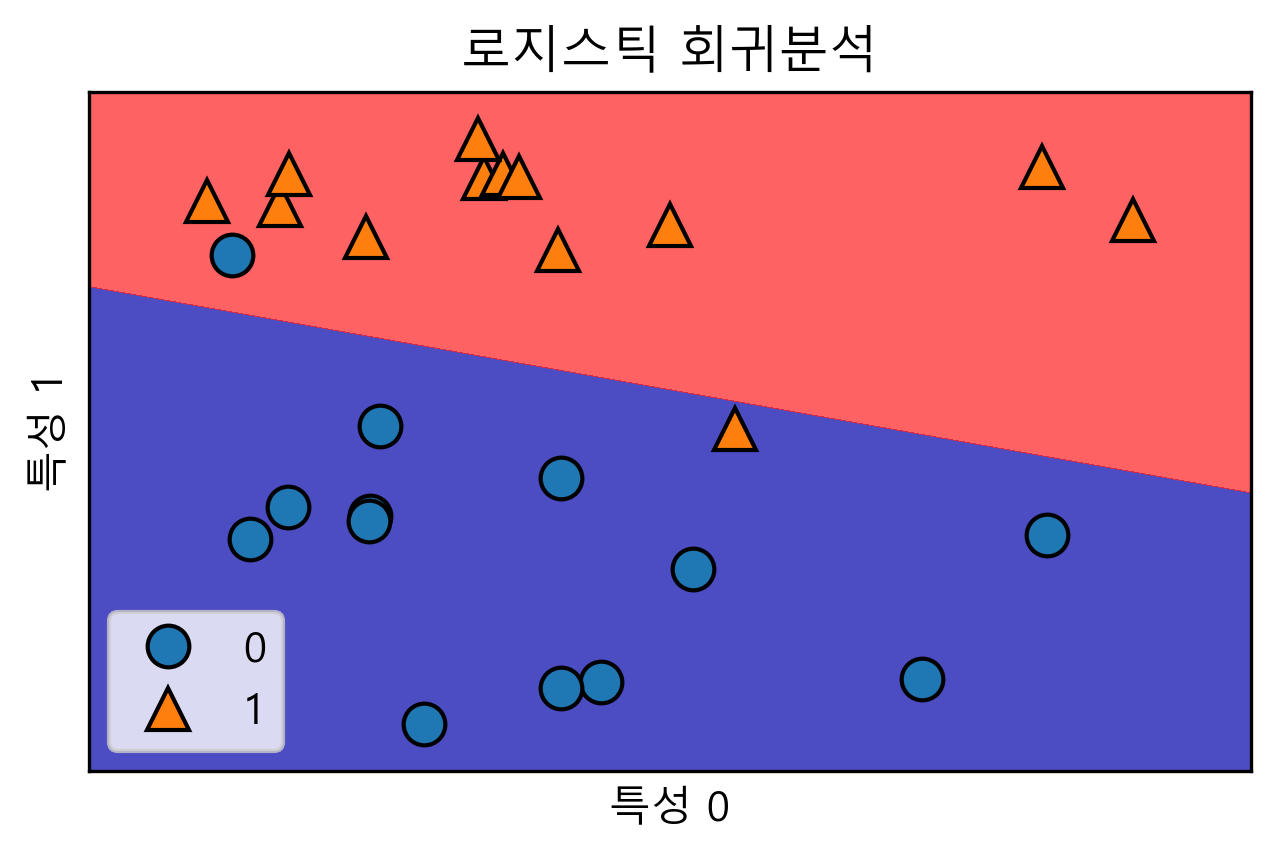

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 1, figsize=(5,3)) # 1행, 1열, 그래프크기

model = LogisticRegression() # 로지스틱회귀분석 모형 만들기
model = model.fit(X, y) # 학습시키기

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title("로지스틱 회귀분석")
axes.set_xlabel("특성 0")
axes.set_ylabel("특성 1")
axes.legend()

In [9]:
model.score(X, y)

0.9230769230769231

In [10]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X)
cm = confusion_matrix(y, pred) # y가 실제값, pred가 예측값
cm

array([[12,  1],
       [ 1, 12]], dtype=int64)

In [11]:
print(np.e) # 오일러 상수
print(np.exp(1)) # y=e의 1승
print(np.exp(2)) # y=e의 2승

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


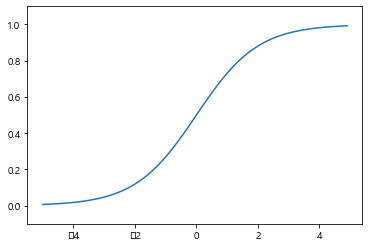

In [12]:
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)

In [22]:
from sklearn.datasets import make_classification
import statsmodels.api as sm

X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.7658
Time:                        13:15:55   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


In [23]:
result = logit_res.predict(X)[:5]
print(result)
for a in result: # 로지스틱회귀분석은 0에서 1사이의 값만 나오기 때문에 0.5를 기준으로 이상이면 1, 미만이면 0으로 출력
    print(int(round(a)), end=' ')

[0.08580852 0.99949403 0.00370571 0.99933961 0.30472943]
0 1 0 1 0 

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


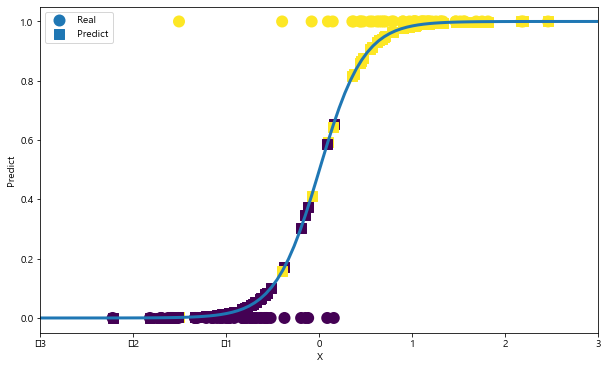

In [16]:
xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx)
plt.figure(figsize=(10, 6))
plt.plot(xx, pred, lw=3)
plt.scatter(X, y, c=y, s=100, lw=2, label='Real')
plt.scatter(X, logit_res.predict(X), label='Predict', marker='s', c=y, s=100, lw=1)
plt.xlim(-3, 3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()

In [17]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False) # 로그 손실값 log_loss(). 확률이 낮아질수록 log_loss는 크게 나타남

16.226122466352443

In [18]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [19]:
np.ones_like(y) # 리스트와 같은 사이즈의 리스트를 1로 채움

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# 실제 y 값의 평균으로 계산한 로그 손실값

y_null = np.ones_like(y)
print(y_null)
log_loss(y, y_null, normalize=False)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


1692.4392236247027

In [21]:
# 결정계수값(Pseudo R-squ.)

1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.9904125818878147

In [24]:
from sklearn.model_selection import train_test_split
# stratify=y는 학습용과 검증용을 나누고 그 안에서 각각 0 클래스 샘플 수와 1 클래스 샘플 수를 맞춰주는 것
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
print(model.classes_) # 출력값
print(model.intercept_) # 절편
print(model.coef_) # 회귀계수

[0 1]
[0.01210487]
[[2.99972644]]


In [26]:
# 0일 확률, 1일 확률
model.predict_proba(X_test)

array([[0.00935192, 0.99064808],
       [0.00428094, 0.99571906],
       [0.98204208, 0.01795792],
       [0.11773589, 0.88226411],
       [0.10564409, 0.89435591],
       [0.94862134, 0.05137866],
       [0.9892088 , 0.0107912 ],
       [0.13379119, 0.86620881],
       [0.00138017, 0.99861983],
       [0.84331206, 0.15668794],
       [0.8996786 , 0.1003214 ],
       [0.94798802, 0.05201198],
       [0.91098884, 0.08901116],
       [0.25466241, 0.74533759],
       [0.04540992, 0.95459008],
       [0.96422105, 0.03577895],
       [0.99385324, 0.00614676],
       [0.88332811, 0.11667189],
       [0.85162766, 0.14837234],
       [0.03287681, 0.96712319]])

In [27]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [28]:
model.score(X_test, y_test)

0.95

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [32]:
# confusion_matrix를 좀 더 자세히 볼 수 있는 classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

# precision은 정확도, 정밀도
# recall은 재현율, 검출율
# f1-score은 precision과 recall의 조화평균(불균형 데이터셋에 많이 사용)
# support는 실제값의 갯수
# accuracy는 정확도

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



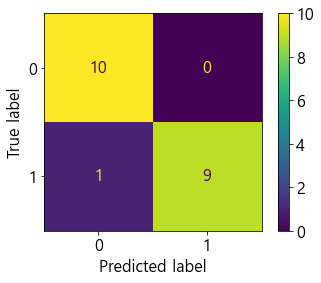

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plt.rcParams.update({'font.size':16})
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# 미국 의대 입학관련 데이터셋

In [33]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


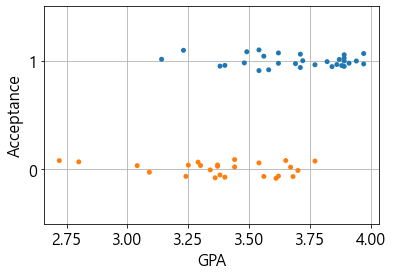

In [34]:
import seaborn as sns

# jitter=True면 동일한 수치의 데이터일 경우 dot을 겹치지 않게 보여주는 것
sns.stripplot(x="GPA", y="Acceptance", data=df_med, jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

In [35]:
# 변수의 경우 MCAT는 VR+PS+WS+BS이기 때문에 다중공선성 문제가 생길 수 있어 제외

model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5913
Time:                        14:53:28   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

In [37]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


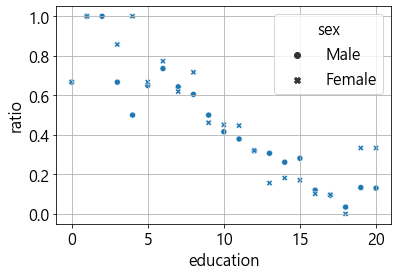

In [38]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [39]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3435
Time:                        15:03:46   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [40]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3422
Time:                        15:04:23   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

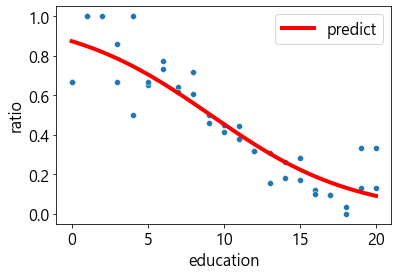

In [41]:
import pandas as pd

sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education":xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="predict")
plt.legend()
plt.show()

In [ ]:
# 샘플수가 낮은 쪽으로 맞춰서 전처리를 하는 것을 언더 샘플링under sampling이라고 함

In [22]:
import pandas as pd

df = pd.read_csv("c:/data/ozone/ozone2.csv")
# 오존량 분류를 기준으로 한 평균값
df.groupby("Result").mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,166.338719,11.270833,72.652778,20.902778
1,204.980096,8.790123,82.530864,60.997339


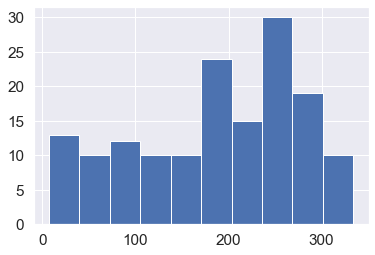

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# 일조량과 빈도
df["Solar.R"].hist()
plt.show()

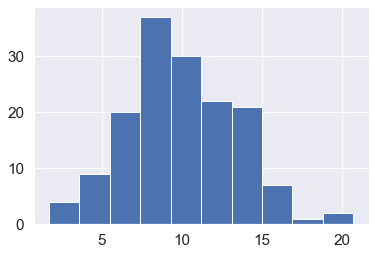

In [24]:
%matplotlib inline

#풍량과 빈도
df["Wind"].hist()
plt.show()

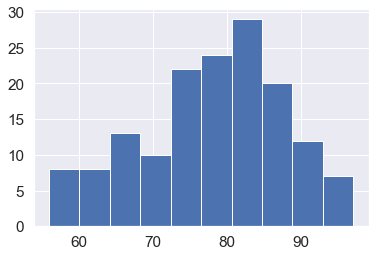

In [25]:
%matplotlib inline

# 온도와 빈도
df["Temp"].hist()
plt.show()

In [26]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

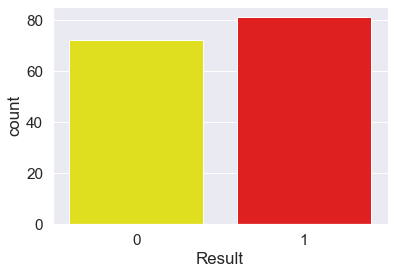

In [27]:
import seaborn as sns

colors=["yellow", "red"]

# 불균형 데이터셋
sns.countplot('Result', data=df, palette=colors)

In [28]:
# 언더샘플링

from imblearn.under_sampling import RandomUnderSampler

cols = ["Solar.R", "Wind", "Temp"]
X = df[cols]
y = df["Result"]

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [29]:
# 오버샘플링

from imblearn.over_sampling import SMOTE

cols = ["Solar.R", "Wind", "Temp"]
X = df[cols]
y = df["Result"]

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [30]:
df2["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

In [31]:
cols = ["Solar.R", "Wind", "Temp"]
X = X_samp[cols]
y = y_samp["Result"]

In [32]:
import statsmodels.api as sm

model = sm.Logit(y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.576005
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  162
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.1690
Time:                        16:00:18   Log-Likelihood:                -93.313
converged:                       True   LL-Null:                       -112.29
Covariance Type:            nonrobust   LLR p-value:                 5.733e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0040      0.002      1.922      0.055   -7.76e-05       0.008
Wind          -0.2766      0.054     -5.102      0.000      -0.383      -0.170
Temp           0.0266      0.008      3.394      0.001       0.011       0.042
==============================================================================
"""

In [33]:
cols = ["Wind", "Temp"]
X = X_samp[cols]
y = y_samp["Result"]
df2 = pd.concat([X,y],axis=1)

In [34]:
model = sm.Logit(y,X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.152     
Dependent Variable: Result           AIC:              194.4356  
Date:               2021-12-07 16:00 BIC:              200.6108  
No. Observations:   162              Log-Likelihood:   -95.218   
Df Model:           1                LL-Null:          -112.29   
Df Residuals:       160              LLR p-value:      5.1178e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2610     0.0523   -4.9950   0.0000   -0.3635   -0.1586
Temp       0.0342     0.0069    4.9515   0.0000    0.0206    0.0477
=================================================================

"""

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.8217054263565892
검증용 :  0.5757575757575758


In [37]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [38]:
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,7,7
1,7,12


<AxesSubplot:>

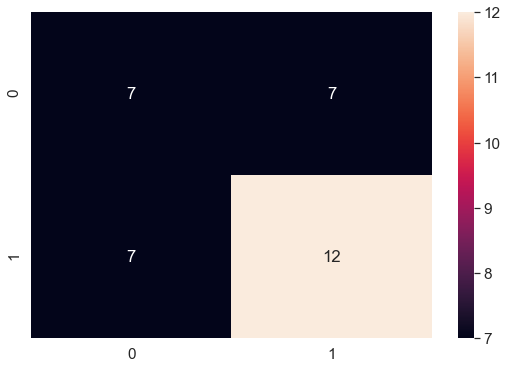

In [39]:
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True)